## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# reading the file into the notebook
cmp_df=pd.read_csv(r"C:\Users\Emily Maduike\Documents\analysis stuff\excel\companies.csv")

# displaying dataset columns
cmp_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [6]:
# displaying shape of dataset
cmp_df.shape

(196553, 44)

In [13]:
# filtering relevant columns
cmp_df=cmp_df[['normalized_name','category_code','status','funding_total_usd','country_code', 
               'state_code','city','region','funding_rounds','founded_at']]

# displaying the dataset
cmp_df.head()

,normalized_name,category_code,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17
1,flektor,games_video,acquired,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN
2,there,games_video,acquired,NaN,USA,CA,San Mateo,SF Bay,NaN,NaN
3,mywebbo,network_hosting,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26
4,the movie streamer,games_video,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26


In [14]:
# checking the size of the dataframe
cmp_df.shape #the size of the datframe is (196553, 11)
print(f'the size before dropping dupicates is, {cmp_df.shape}')

#checking for duplicates
cmp_df.duplicated().sum()

#removing duplicates
cmp_df.drop_duplicates(inplace=True)

#checking again for duplicates
cmp_df.duplicated().sum()

#new size of dataframe
print(f'the size after dropping duplicates is, {cmp_df.shape}')

the size before dropping dupicates is, (196553, 10)
the size after dropping duplicates is, (196313, 10)


In [15]:
# checking the datatypes of columns
cmp_df.info()

# changing the 'founded_at' column to datetime object
cmp_df['founded_at']=pd.to_datetime(cmp_df['founded_at'])

# displaying the datatypes of columns
cmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196313 entries, 0 to 196552
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   normalized_name    196297 non-null  object 
 1   category_code      123166 non-null  object 
 2   status             196313 non-null  object 
 3   funding_total_usd  27874 non-null   float64
 4   country_code       87984 non-null   object 
 5   state_code         50899 non-null   object 
 6   city               83884 non-null   object 
 7   region             196313 non-null  object 
 8   funding_rounds     31707 non-null   float64
 9   founded_at         91218 non-null   object 
dtypes: float64(2), object(8)
memory usage: 16.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 196313 entries, 0 to 196552
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   normalized_name    196297 non-

In [16]:
#rename 'category_code' column
cmp_df.rename(columns={'category_code':'sector'}, inplace=True)

# adding the year column
cmp_df['year'] = cmp_df['founded_at'].dt.year
cmp_df['year'] = cmp_df['year'].astype('Int64')
cmp_df.head()

,normalized_name,sector,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at,year
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17,2005
1,flektor,games_video,acquired,NaN,USA,CA,Culver City,Los Angeles,NaN,NaT,<NA>
2,there,games_video,acquired,NaN,USA,CA,San Mateo,SF Bay,NaN,NaT,<NA>
3,mywebbo,network_hosting,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26,2008
4,the movie streamer,games_video,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26,2008


In [17]:
# displaying dataset statistics
cmp_df.describe()

,funding_total_usd,funding_rounds,founded_at,year
count,2.787400e+04,31707.000000,91218,91218.0
mean,1.481652e+07,1.659760,2005-12-21 13:55:53.259225088,2005.720033
min,2.910000e+02,1.000000,1901-01-01 00:00:00,1901.0
25%,5.000000e+05,1.000000,2004-02-15 06:00:00,2004.0
50%,2.564500e+06,1.000000,2009-01-01 00:00:00,2009.0
75%,1.100000e+07,2.000000,2011-03-01 00:00:00,2011.0
max,5.700000e+09,15.000000,2014-10-01 00:00:00,2014.0
std,6.775937e+07,1.201666,NaN,9.828742


In [18]:
# checking for null values
cmp_df.isnull().sum()

# filling the string columns with 'Unknown'
cmp_df[cmp_df.select_dtypes(include='object').columns]=cmp_df.select_dtypes(include='object').fillna('Unknown')

# dropping null values
cmp_df.dropna()

,normalized_name,sector,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at,year
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17,2005
13,friendfeed,web,acquired,5000000.0,USA,CA,Mountain View,SF Bay,1.0,2007-10-01,2007
19,fitbit,health,operating,68069200.0,USA,CA,San Francisco,SF Bay,5.0,2007-10-01,2007
20,mtpv,cleantech,operating,10125293.0,USA,TX,Austin,Austin,3.0,2003-01-01,2003
24,demandbase,analytics,operating,33000000.0,USA,CA,San Francisco,SF Bay,3.0,2006-01-01,2006
...,...,...,...,...,...,...,...,...,...,...,...
196537,chatterblock,social,operating,500000.0,CAN,Unknown,Victoria,Victoria,1.0,2011-01-11,2011
196540,shattered reality interactive,games_video,closed,1100000.0,USA,CA,San Francisco,SF Bay,2.0,2006-06-01,2006
196547,imindi,advertising,operating,500000.0,Unknown,Unknown,Unknown,unknown,2.0,2008-09-01,2008
196549,fohboh,public_relations,operating,750000.0,USA,CA,San Jose,SF Bay,1.0,2007-11-01,2007


In [27]:
# adding the funding range column
cmp_df['funding_range']=pd.cut(cmp_df['funding_total_usd'],
                               bins = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, cmp_df['funding_total_usd'].max()],
                               labels = ['Less than 100K','100K - 500K','500K - 1M',
                                        '1M - 5M',
                                        '5M - 10M',
                                        '10M - 50M',
                                        '50M - 100M',
                                        '100M - 500M',
                                        '500M+'],right=True)


In [19]:
# extracting the no. of unique sectors 
print('the no. of unique sectors are:\n ',len(cmp_df['sector'].unique()))

# checking max no. of funding rounds
print('the highest no. of funding rounds is:\n',cmp_df['funding_rounds'].max()) #15

# checking for the most recent year
print('the most recent year is:\n', cmp_df['year'].max()) #2014

# checking for the oldest year
print('the oldest year is:\n',cmp_df['year'].min()) #1901

# extracting the unique years 
print('the unique years are:\n',cmp_df['year'].unique())

# extracting the unique status categories
print('the unique status categories are:\n',cmp_df['status'].unique())

the no. of unique sectors are:
  43
the highest no. of funding rounds is:
 15.0
the most recent year is:
 2014
the oldest year is:
 1901
the unique years are:
 <IntegerArray>
[2005, <NA>, 2008, 2007, 2011, 2003, 2009, 2006, 2012, 2010,
 ...
 2014, 1929, 1916, 1925, 1939, 1911, 1944, 1909, 1914, 1905]
Length: 115, dtype: Int64
the unique status categories are:
 ['operating' 'acquired' 'closed' 'ipo']


## What are the Sectors with the highest Funding?

In [20]:
# grouping by'sector' and finding the sum of 'funding_total_usd', then extracting the top 5 sectors
sector_trends=cmp_df.groupby('sector')['funding_total_usd'].sum().nlargest(10)

# passing the object into a dataframe
sector_trends=pd.DataFrame(sector_trends)

# displaying the dataframe
sector_trends


,funding_total_usd
sector,
biotech,6.686868e+10
software,4.176832e+10
cleantech,3.867019e+10
mobile,2.989867e+10
enterprise,2.134636e+10
web,1.891835e+10
ecommerce,1.762815e+10
hardware,1.496217e+10
games_video,1.472512e+10


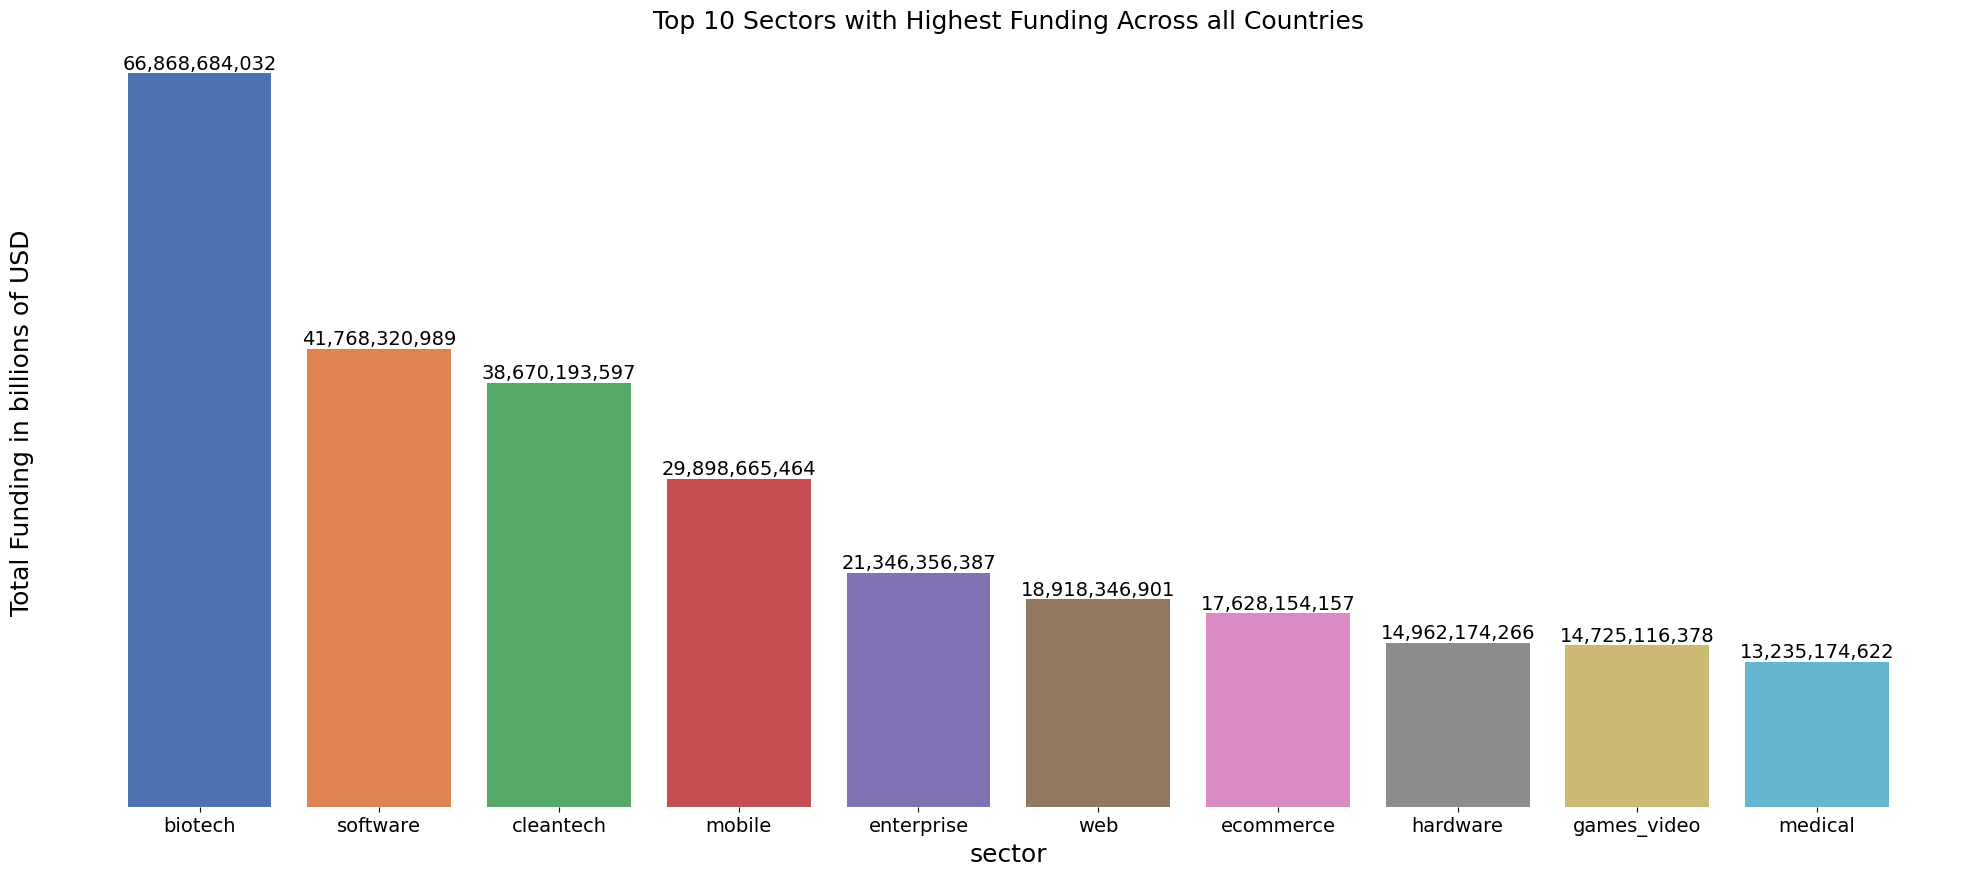

In [22]:
# defining the  figure size
fig,ax=plt.subplots(figsize=(25,10))

#ensuring the bars are different colours
colours = sns.color_palette("deep", len(sector_trends))

for i, ix in enumerate(sector_trends.index):
    ax.bar(ix, sector_trends.loc[ix], color=colours[i], label=str(ix),width=0.8)

#adding data labels
bars=ax.patches

for bar,label in zip(bars, sector_trends['funding_total_usd']):
    height= bar.get_height()
    f_label='{:,.0f}'.format(label)
    
    plt.text(bar.get_x() + bar.get_width() /2, height, f'{f_label}',ha='center', va='bottom',fontsize=14) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])  

plt.xticks(fontsize=14)
plt.xlabel('sector',fontsize=18)
plt.ylabel('Total Funding in billions of USD', fontsize=18)
plt.title('Top 10 Sectors with Highest Funding Across all Countries',fontsize=18)
plt.show()


## What are the funding trends in the last 5 years for the top performing sectors?


In [23]:
# passing the top 10 sectors into a list to filter the dataframe
top=['software', 'biotech', 'cleantech', 'mobile', 'enterprise', 'web', 'ecommerce', 'advertising', 'games_video', 'network_hosting']

# copying the original dataset to filter rows by sector
cmp_df_copy=cmp_df.copy()

# filtering the dataframe
cmp_df_copy=cmp_df_copy.query('sector == @top & year >= 2009 & year < 2014')

# grouping by year and sector to find the sum of 'total_funding_usd'
top_sectors=cmp_df_copy.groupby(['year','sector']).agg(
    funding_total_usd=('funding_total_usd','sum'),
    funding_rounds=('funding_rounds','count'))

# passing the data into a dataframe and restting the index
top_sectors=pd.DataFrame(top_sectors).reset_index()
top_sectors


,year,sector,funding_total_usd,funding_rounds
0,2009,advertising,7.486801e+08,141
1,2009,biotech,2.007693e+09,153
2,2009,cleantech,1.164339e+09,72
3,2009,ecommerce,1.418920e+09,136
4,2009,enterprise,2.013988e+09,164
5,2009,games_video,6.506018e+08,121
6,2009,mobile,1.316305e+09,145
7,2009,network_hosting,2.142548e+08,19
8,2009,software,1.607470e+09,329
9,2009,web,1.262551e+09,254


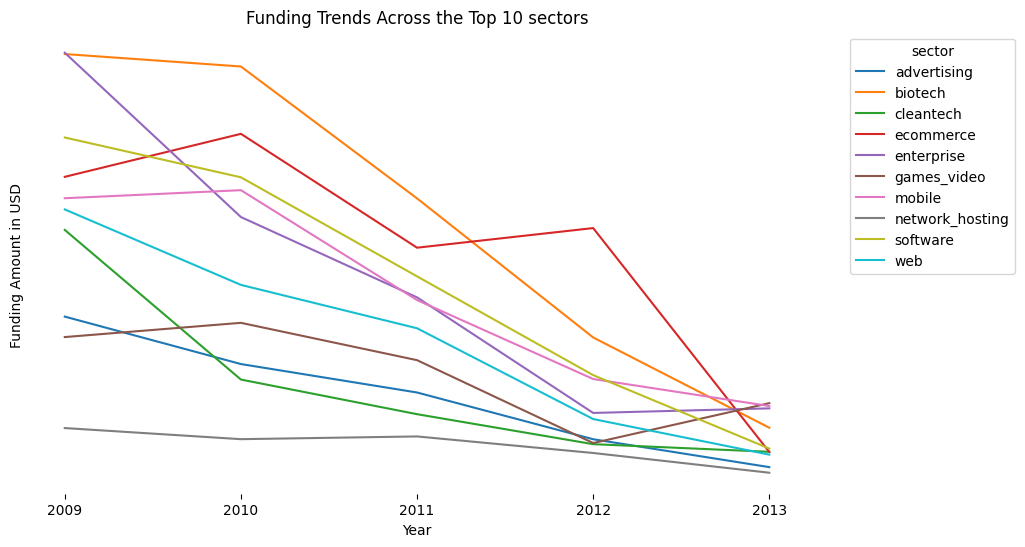

In [24]:
fig,ax=plt.subplots(figsize=(10,6))

# plotting the data
sns.lineplot(data=top_sectors, x='year', y='funding_total_usd',
             hue='sector',palette="tab10")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])  
ax.set_xticks([2009,2010,2011,2012,2013])
# adding the title,legend, x and y axis labels
plt.legend(title='sector', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Funding Amount in USD ')
plt.grid(False)
plt.title('Funding Trends Across the Top 10 sectors')
plt.show()

## What Sectors have the highest 'funding_per_round' and 'funding_per_round_per_startup'?

In [25]:
# grouping by sector to calculate the average 'funding_total_usd'
by_sector = cmp_df.groupby(['sector']).agg(
    funding_total=('funding_total_usd','sum'),
    no_of_startups=('normalized_name','nunique'),
    funding_rounds_count=('funding_rounds', 'count')
)

# getting the top 5 sectors with highest avg funding
by_sector=pd.DataFrame(by_sector)
by_sector['funding_per_round']= by_sector['funding_total']/by_sector['funding_rounds_count']

# passing into a dataframe
by_sector['funding_per_round_per_startup']= by_sector['funding_total']/ (by_sector['no_of_startups']*by_sector['funding_rounds_count'])
by_sector['funding_per_round_per_startup']=by_sector['funding_per_round_per_startup'].round(0)
# resetting the index
by_sector=by_sector.reset_index()
by_sector_5=by_sector.nlargest(10,'funding_per_round')
by_startup_5=by_sector.nlargest(10,'funding_per_round_per_startup')

by_sector_5
by_startup_5

,sector,funding_total,no_of_startups,funding_rounds_count,funding_per_round,funding_per_round_per_startup
25,nanotech,2.160290e+09,70,59,3.661509e+07,523073.0
14,government,2.469835e+08,43,11,2.245305e+07,522164.0
3,automotive,3.594221e+09,291,87,4.131288e+07,141969.0
30,pets,1.140078e+08,61,26,4.384914e+06,71884.0
40,transportation,1.688408e+09,488,96,1.758758e+07,36040.0
36,semiconductor,1.115151e+10,696,447,2.494745e+07,35844.0
22,messaging,2.027797e+09,296,242,8.379326e+06,28309.0
28,nonprofit,4.357808e+08,183,97,4.492586e+06,24550.0
20,manufacturing,5.931190e+09,680,369,1.607369e+07,23638.0
33,real_estate,1.690685e+09,472,154,1.097847e+07,23259.0


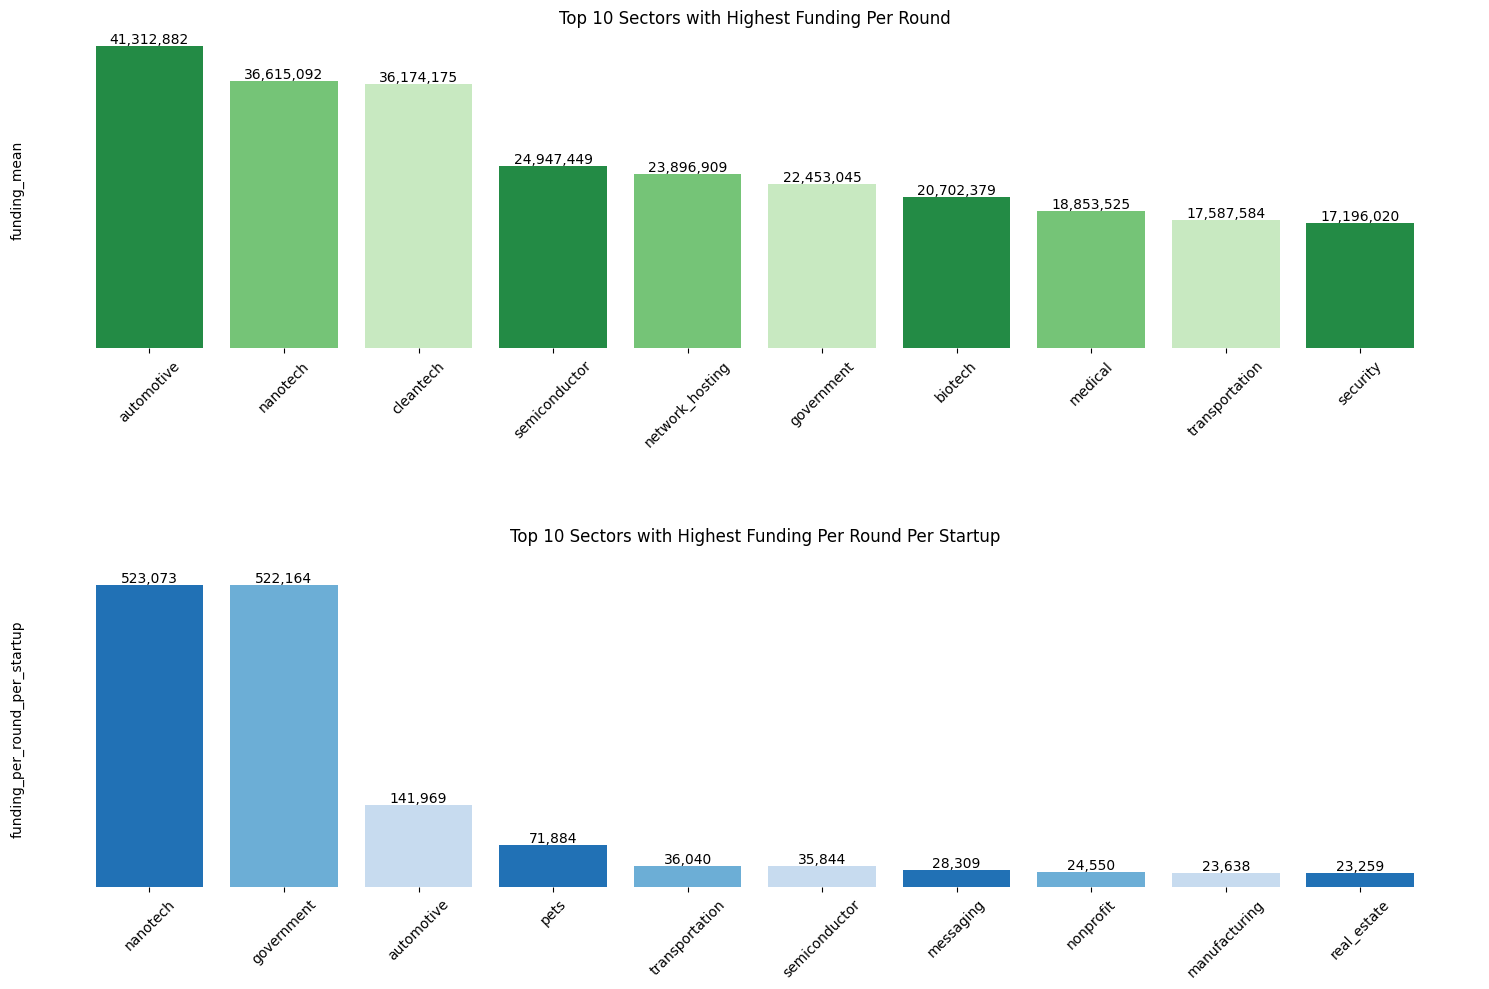

In [26]:
fig,ax=plt.subplots(2,1,figsize=(15,10))

# plotting the bar chart
funding_per_round = ax[0].bar(by_sector_5['sector'], 
                              by_sector_5['funding_per_round'], width=0.8,
                              color=sns.color_palette('Greens_r', n_colors=3))

# adding data labels
for bar, label in zip(funding_per_round, by_sector_5['funding_per_round']):
    height = bar.get_height()
    formatted_label = '{:,.0f}'.format(label)  # Add commas to the label
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{formatted_label}', ha ='center', va='bottom')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_yticks([])  
 


#add labels to the x & y axis
ax[0].grid(False)
ax[0].set_ylabel('funding_mean')
ax[0].set_title('Top 10 Sectors with Highest Funding Per Round')

funding_per_round_per_startup= ax[1].bar(by_startup_5['sector'],
                                        by_startup_5['funding_per_round_per_startup'],
                                        color=sns.color_palette('Blues_r', n_colors=3))

for bar, label in zip(funding_per_round_per_startup, by_startup_5['funding_per_round_per_startup'] ):
    height=bar.get_height()
    ax[1].text(bar.get_x()+ bar.get_width() / 2, height, '{:,.0f}'.format(label), ha='center', va='bottom')

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].set_yticks([]) 

ax[1].grid(False)
ax[1].set_ylabel('funding_per_round_per_startup')
ax[1].set_title('\n\n\nTop 10 Sectors with Highest Funding Per Round Per Startup\n')

for axis in ax:
    axis.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Funding Trends over the last decade and funding dist. across classes

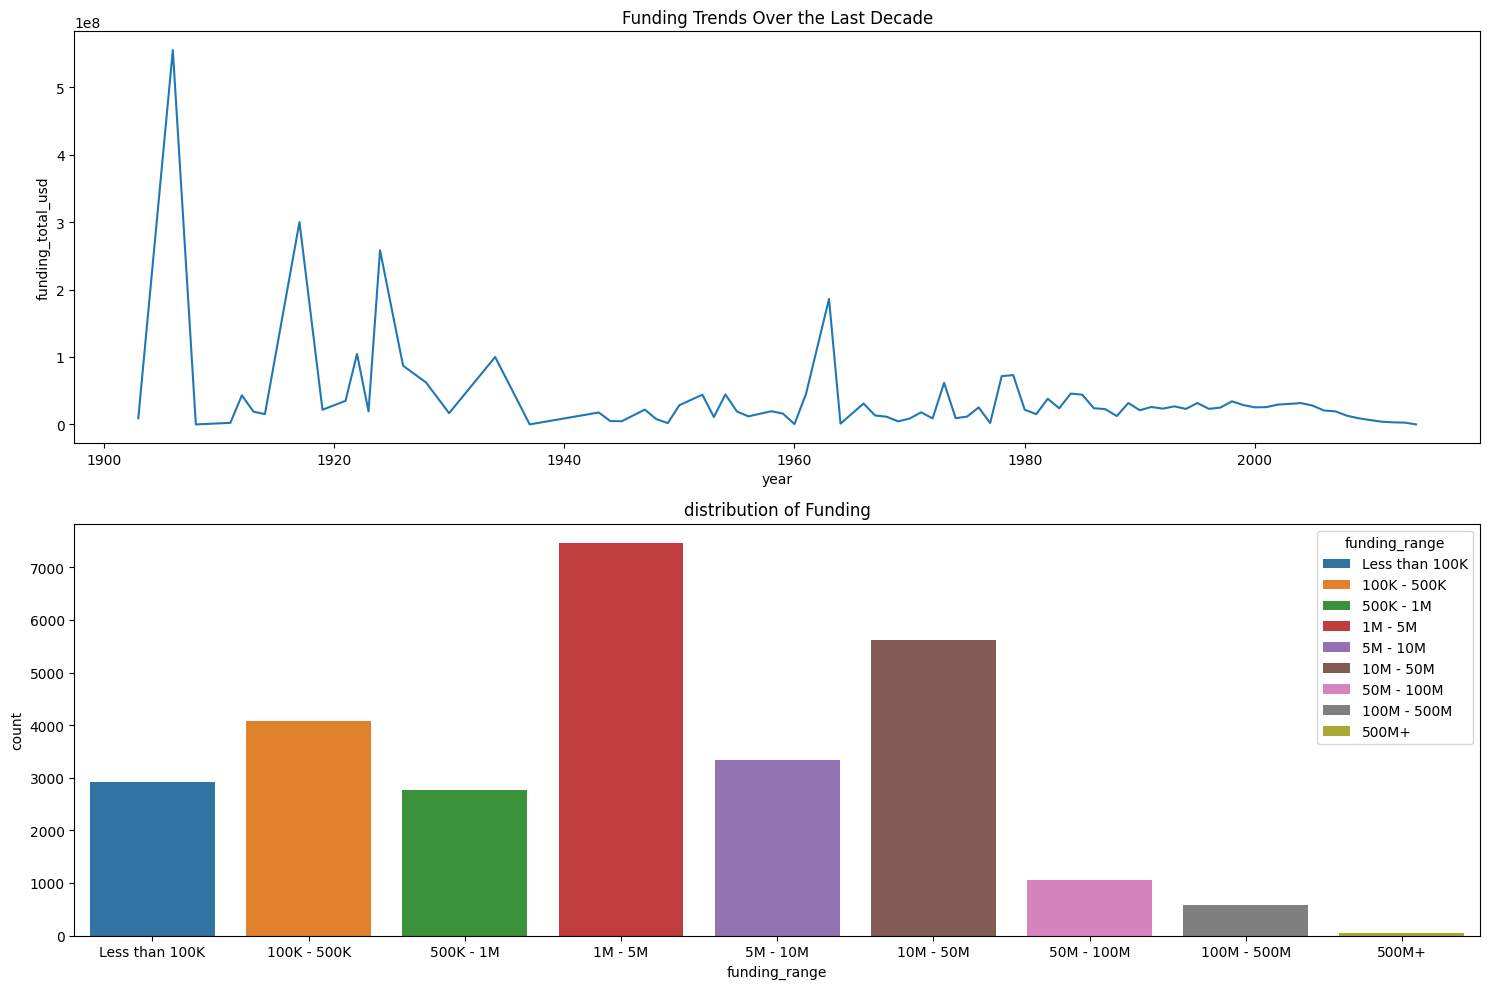

In [30]:
# defining plot size and multiple subplots
fig,ax = plt.subplots(2,1,figsize=(15,10))

# plotting the funding trends over the last decade 
sns.lineplot(x=cmp_df.year ,y=cmp_df.funding_total_usd,ax=ax[0],errorbar=None)
# adding axis title
ax[0].set_title('Funding Trends Over the Last Decade')

# plotting the funding distribution
sns.countplot(x=cmp_df.funding_range, ax=ax[1] ,hue=cmp_df.funding_range)

# adding axis title
ax[1].set_title('distribution of Funding')
plt.tight_layout()



## what countries are startup hubs(generate the most funding)

In [35]:
# grouping by country to obtain the avg. funding total for each country
country= cmp_df.groupby('country_code')['funding_total_usd'].mean().nlargest(5).reset_index()

# converting to a dataframe for plotting
country=pd.DataFrame(country)
country


,country_code,funding_total_usd
0,BMU,2.505553e+08
1,LUX,6.948423e+07
2,MYS,4.483413e+07
3,CHN,3.915655e+07
4,UMI,3.050000e+07


Text(0.5, 1.0, 'countries with highest avg. startup funding')

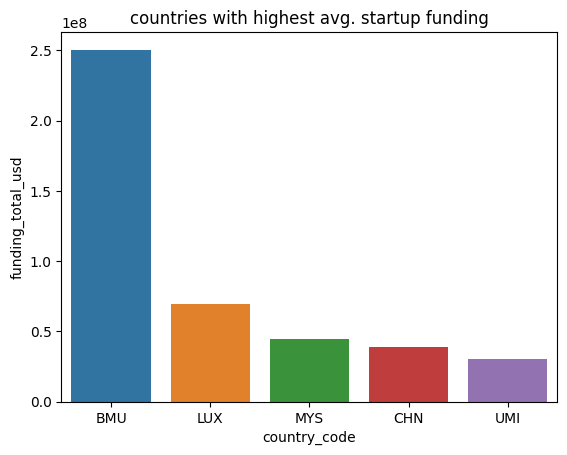

In [39]:
# plotting the countries with the highest avg funding total
sns.barplot(x=country['country_code'],y=country['funding_total_usd'], hue=country['country_code'])
# adding plot title
plt.title('countries with highest avg. startup funding')


## what regions are startup hubs(have highest avg. funding)?

In [41]:
# grouping by region to get the regions with highest avg funding total
reg=cmp_df.groupby('region')['funding_total_usd'].mean().nlargest(5).reset_index()

# converting to a dataframe
reg=pd.DataFrame(reg)
reg

,region,funding_total_usd
0,Norwalk,1.100000e+09
1,Taito-ku,5.400000e+08
2,Kloten,5.150000e+08
3,Burleigh Heads,3.821069e+08
4,East Norriton,2.762635e+08


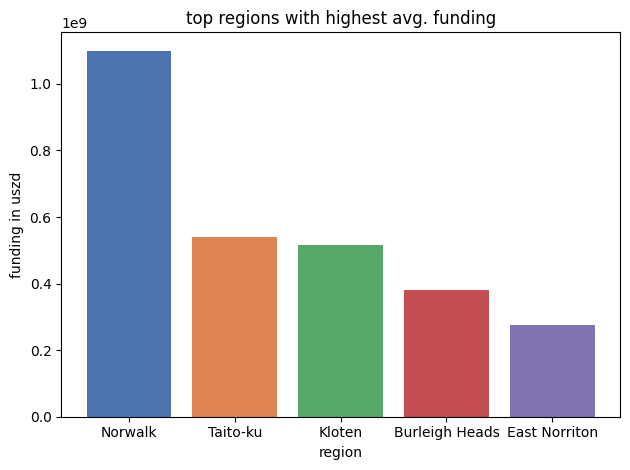

In [46]:
# plotting the top regions with the highest avg funding
plt.bar(reg['region'],reg['funding_total_usd'], color=sns.color_palette('deep'))

# adding x and y axis labels and plot title
plt.title('top regions with highest avg. funding')
plt.xlabel('region')
plt.ylabel('funding in uszd')
plt.tight_layout()